# BT4012 Fraud Analytics Project

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from scipy import stats
from imblearn.over_sampling import ADASYN
from torch_geometric.data import Data
from sknetwork.data import from_edge_list
from sknetwork.clustering import Louvain, get_modularity
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report, f1_score, roc_curve, auc, roc_auc_score, confusion_matrix, make_scorer, average_precision_score
import folium as fo
import torch
import torch.nn as nn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from IPython.display import SVG
from sknetwork.visualization import svg_bigraph


https://www.kaggle.com/code/badmangamingsv/credit-card-fraud-detection/notebook

^ Can reference from this and take this out before submission

## Importing Data

In [220]:
train = pd.read_csv("fraudTrain.csv", index_col=0)
test = pd.read_csv("fraudTest.csv", index_col=0)

In [180]:
train.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [181]:
test.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city  ...      lat  \
0   Elliott      M            351 Darlene Green    Columbia  ...  33.9659   
1  Williams      F             3638 Marsh Union     Altonah  ...  40.3207   
2     Lopez      F         9333 Valentine Point    Bellmore  ...  40.6729   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville  ...  28.5697   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth  ...  44.2529   

       long  city_pop                     job         dob  \
0  -80.9355    333497     Mechanical engineer  1968-03-19   
1 -110.4360       302  Sales professional, IT  1990-01-17   
2  -73.5365     34496       Librarian, public  1970-10-21   
3  -80.8191     54767            Set designer  1987-07-25   
4  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [182]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [183]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [184]:
train.describe().T

count          mean           std           min           25%  \
cc_num      1296675.0  4.171920e+17  1.308806e+18  6.041621e+10  1.800429e+14   
amt         1296675.0  7.035104e+01  1.603160e+02  1.000000e+00  9.650000e+00   
zip         1296675.0  4.880067e+04  2.689322e+04  1.257000e+03  2.623700e+04   
lat         1296675.0  3.853762e+01  5.075808e+00  2.002710e+01  3.462050e+01   
long        1296675.0 -9.022634e+01  1.375908e+01 -1.656723e+02 -9.679800e+01   
city_pop    1296675.0  8.882444e+04  3.019564e+05  2.300000e+01  7.430000e+02   
unix_time   1296675.0  1.349244e+09  1.284128e+07  1.325376e+09  1.338751e+09   
merch_lat   1296675.0  3.853734e+01  5.109788e+00  1.902779e+01  3.473357e+01   
merch_long  1296675.0 -9.022646e+01  1.377109e+01 -1.666712e+02 -9.689728e+01   
is_fraud    1296675.0  5.788652e-03  7.586269e-02  0.000000e+00  0.000000e+00   

                     50%           75%           max  
cc_num      3.521417e+15  4.642255e+15  4.992346e+18  
amt         4.752000e+01  8.314000e+01  2.894890e+04  
zip         4.817400e+04  7.204200e+04  9.978300e+04  
lat         3.935430e+01  4.194040e+01  6.669330e+01  
long       -8.747690e+01 -8.015800e+01 -6.795030e+01  
city_pop    2.456000e+03  2.032800e+04  2.906700e+06  
unix_time   1.349250e+09  1.359385e+09  1.371817e+09  
merch_lat   3.936568e+01  4.195716e+01  6.751027e+01  
merch_long -8.743839e+01 -8.023680e+01 -6.695090e+01  
is_fraud    0.000000e+00  0.000000e+00  1.000000e+00

In [185]:
numerical_variables = ["cc_num", "amt", "zip", "lat", "long", "city_pop","unix_time", "merch_lat", "merch_long", "is_fraud"]
cat_variables = ["merchant", "category", "first", "last", "gender", "street", "city", "state", "job","dob","trans_num"]
unique_counts = {}
for variable in cat_variables:
    unique_count = train[variable].nunique()
    unique_counts[variable] = unique_count

# Output the count of unique values for each categorical variable
for variable, count in unique_counts.items():
    print(f"There are {count:,} unique values in the '{variable}' column.")

There are 693 unique values in the 'merchant' column.
There are 14 unique values in the 'category' column.
There are 352 unique values in the 'first' column.
There are 481 unique values in the 'last' column.
There are 2 unique values in the 'gender' column.
There are 983 unique values in the 'street' column.
There are 894 unique values in the 'city' column.
There are 51 unique values in the 'state' column.
There are 494 unique values in the 'job' column.
There are 968 unique values in the 'dob' column.
There are 1,296,675 unique values in the 'trans_num' column.


# EDA

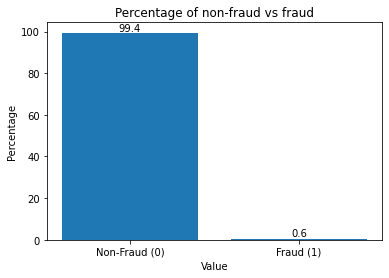

In [186]:
ratio = train["is_fraud"].value_counts() / len(train) *100
ratio

bar_plot = plt.bar(ratio.index, ratio.values)
plt.xlabel("Value")
plt.ylabel("Percentage")
plt.title("Percentage of non-fraud vs fraud")
plt.xticks(ratio.index, labels=["Non-Fraud (0)", "Fraud (1)"])

# Display the ratio on top of the bars
for bar, value in zip(bar_plot, ratio.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.1f}", ha="center", va="bottom")

plt.show()

From the above graph, it is obvious that there is an imbalance in the target variable with more than 99% of it being non-fraud.

## Check `gender` Distribution

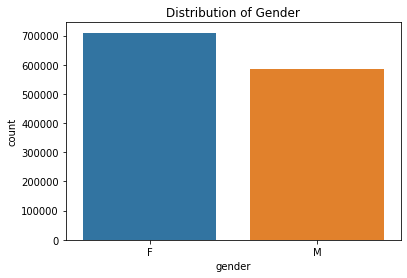

In [187]:
sns.countplot(data=train, x='gender')
plt.title('Distribution of Gender')
plt.show()

## Check `amt` Distribution

In [188]:
sns.kdeplot(data=train["amt"]).set(title="Amount Distribution")

[Text(0.5, 1.0, 'Amount Distribution')]

It seems like there are extreme values (or potential outliers) present in `amt`. The graph below shows the distribution of `amt` for up to the 95<sup>th</sup> percentile.

In [189]:
quantile_95 = train["amt"].quantile(0.95)
filtered_data = train[train["amt"] <= quantile_95]["amt"]
sns.kdeplot(filtered_data).set(title="Amount Distribution (95th Percentile)")

[Text(0.5, 1.0, 'Amount Distribution (95th Percentile)')]

## Check Distribution of `amt` Against Fraud Class

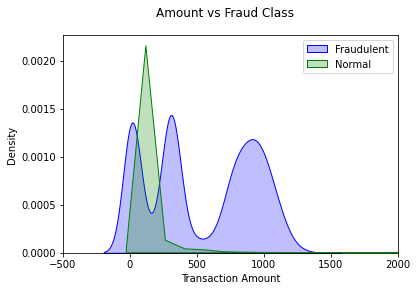

In [190]:
fig, ax = plt.subplots()

sns.kdeplot(train[train["is_fraud"]==1]["amt"], fill=True, color="blue", label="Fraudulent", ax=ax)
sns.kdeplot(train[train["is_fraud"]==0]["amt"], fill=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Transaction Amount")
ax.set_ylabel("Density")

ax.set_xlim(-500,2000)

fig.suptitle("Amount vs Fraud Class")
plt.legend()

Typically, legitimate transactions are approximately $200 or lower, whereas fraudulent transactions often spike near $300 and again between $800 and $1000. This demonstrates a distinct trend.

In [191]:
cities_fraud = pd.DataFrame(train[train["is_fraud"] == 1].state.value_counts().to_frame('count'))
cities_non = pd.DataFrame(train[train["is_fraud"] == 0].state.value_counts().to_frame('count'))
cities = cities_fraud.join(cities_non, lsuffix="_fraud", rsuffix="_non_fraud")
cities.count_non_fraud = cities.count_non_fraud.fillna(0).apply(lambda x: int(x))
cities["fraud_proportion"] = round(cities.count_fraud   / (cities.count_fraud   + cities.count_non_fraud), 10)
cities = cities.sort_values(by="fraud_proportion", ascending=False)

In [192]:
cities

count_fraud  count_non_fraud  fraud_proportion
DE            9                0          1.000000
RI           15              535          0.027273
AK           36             2084          0.016981
NV           47             5560          0.008382
CO          113            13767          0.008141
OR          149            18448          0.008012
TN          140            17414          0.007975
NE          180            23988          0.007448
ME          119            16386          0.007210
NH           59             8219          0.007127
OH          321            46159          0.006906
KS          156            22840          0.006784
VA          198            29052          0.006769
NY          555            82946          0.006647
SC          193            28997          0.006612
FL          281            42390          0.006585
MN          207            31507          0.006527
VT           72            11696          0.006118
SD           74            12250          0.006005
MD          157            26036          0.005994
DC           21             3592          0.005812
CA          326            56034          0.005784
PA          458            79389          0.005736
IL          248            43004          0.005734
UT           61            10638          0.005701
WY          110            19212          0.005693
WV          146            25545          0.005683
GA          146            25917          0.005602
MA           69            12307          0.005575
WI          163            29205          0.005550
KY          155            28320          0.005443
MS          115            21073          0.005428
OK          143            26528          0.005362
IA          142            26843          0.005262
AL          215            40774          0.005245
AR          161            30966          0.005172
MI          238            45916          0.005157
IN          142            27438          0.005149
WA           96            18828          0.005073
TX          479            94397          0.005049
NM           82            16325          0.004998
MO          191            38212          0.004974
NC          149            30117          0.004923
NJ          118            24485          0.004796
LA           91            20874          0.004341
ND           57            14729          0.003855
AZ           37            10733          0.003435
HI            7             2552          0.002735
MT           32            11722          0.002722
CT           16             7686          0.002077
ID           11             5534          0.001984

In [193]:
cities.reset_index().rename(columns={'index': 'state'}).head(10)

state  count_fraud  count_non_fraud  fraud_proportion
0    DE            9                0          1.000000
1    RI           15              535          0.027273
2    AK           36             2084          0.016981
3    NV           47             5560          0.008382
4    CO          113            13767          0.008141
5    OR          149            18448          0.008012
6    TN          140            17414          0.007975
7    NE          180            23988          0.007448
8    ME          119            16386          0.007210
9    NH           59             8219          0.007127

Text(0.5, 1.0, 'Top 10 States by Fraud Proportion')

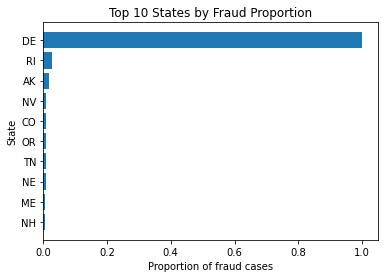

In [194]:
# Filter only top 10 based on fraud proportion
cities_filtered = cities.head(10).reset_index().rename(columns={'index': 'state'}).sort_values(by="fraud_proportion", ascending=True)
plt.barh(cities_filtered.state, cities_filtered.fraud_proportion)
plt.xlabel("Proportion of fraud cases")
plt.ylabel("State")
plt.title("Top 10 States by Fraud Proportion")

The above graph shows the top 10 states based on fraud proportion. Interestingly, state DE (Delaware) has 9 transactions that occurred and all of them were fraudulent.

## Check Location Of Merchants Where Fraudulent Transactions Occurred

In [195]:
map = fo.Map(location=[45.50, -100.75], zoom_start=5)

In [196]:
filtered_geo_data = train[train["is_fraud"] == 1]
points = filtered_geo_data[["merch_lat", "merch_long"]].apply(tuple, axis=1)
for point in points:
    fo.CircleMarker(location=[point[0], point[1]], fill_color="red", fill=True, radius=5).add_to(map)
map

The graph above shows the distribution of fraudulent transactions in the United States. It seems that there are more fraudulent transactions in the eastern side of the United States than central and western United States.

## Quantile Analysis

In [197]:
quantile = train[numerical_variables].describe().loc[['min', '25%', '50%', '75%', 'max']].transpose()
quantile.columns = ['min', 'Q1', 'Q2', 'Q3', 'max']
quantile['range'] = quantile['max'] - quantile['min']
quantile['IQR'] = quantile['Q3'] - quantile['Q1']
quantile.drop(["cc_num", "zip", "lat", "long", "unix_time", "merch_lat", "merch_long"], axis=0)

min      Q1       Q2        Q3        max      range       IQR
amt        1.0    9.65    47.52     83.14    28948.9    28947.9     73.49
city_pop  23.0  743.00  2456.00  20328.00  2906700.0  2906677.0  19585.00
is_fraud   0.0    0.00     0.00      0.00        1.0        1.0      0.00

In [198]:
quantile = train[numerical_variables].describe().loc[['min', '25%', '50%', '75%', 'max']].transpose()
quantile.columns = ['min', 'Q1', 'Q2', 'Q3', 'max']
quantile['range'] = quantile['max'] - quantile['min']
quantile['IQR'] = quantile['Q3'] - quantile['Q1']
quantile.drop(["cc_num", "zip", "lat", "long", "unix_time", "merch_lat", "merch_long"], axis=0)

min      Q1       Q2        Q3        max      range       IQR
amt        1.0    9.65    47.52     83.14    28948.9    28947.9     73.49
city_pop  23.0  743.00  2456.00  20328.00  2906700.0  2906677.0  19585.00
is_fraud   0.0    0.00     0.00      0.00        1.0        1.0      0.00

In [199]:
descriptive_stats = train[numerical_variables].describe().loc[['mean', 'std', '50%']].transpose()
descriptive_stats.columns = ['mean', 'std', 'median']
descriptive_stats['mode'] = train[numerical_variables].mode().transpose()[0]
descriptive_stats['mad'] = [stats.median_abs_deviation(train[x]) for x in numerical_variables]
descriptive_stats['kurtosis'] = [stats.kurtosis(train[x]) for x in numerical_variables]
descriptive_stats['skewness'] = [stats.skew(train[x]) for x in numerical_variables]
descriptive_stats.drop(["cc_num", "zip", "lat", "long", "unix_time", "merch_lat", "merch_long"], axis=0)

mean            std   median    mode     mad     kurtosis  \
amt          70.351035     160.316039    47.52    1.14    37.5  4545.627447   
city_pop  88824.440563  301956.360689  2456.00  606.00  2198.0    37.614370   
is_fraud      0.005789       0.075863     0.00    0.00     0.0   167.757621   

           skewness  
amt       42.277825  
city_pop   5.593847  
is_fraud  13.029107

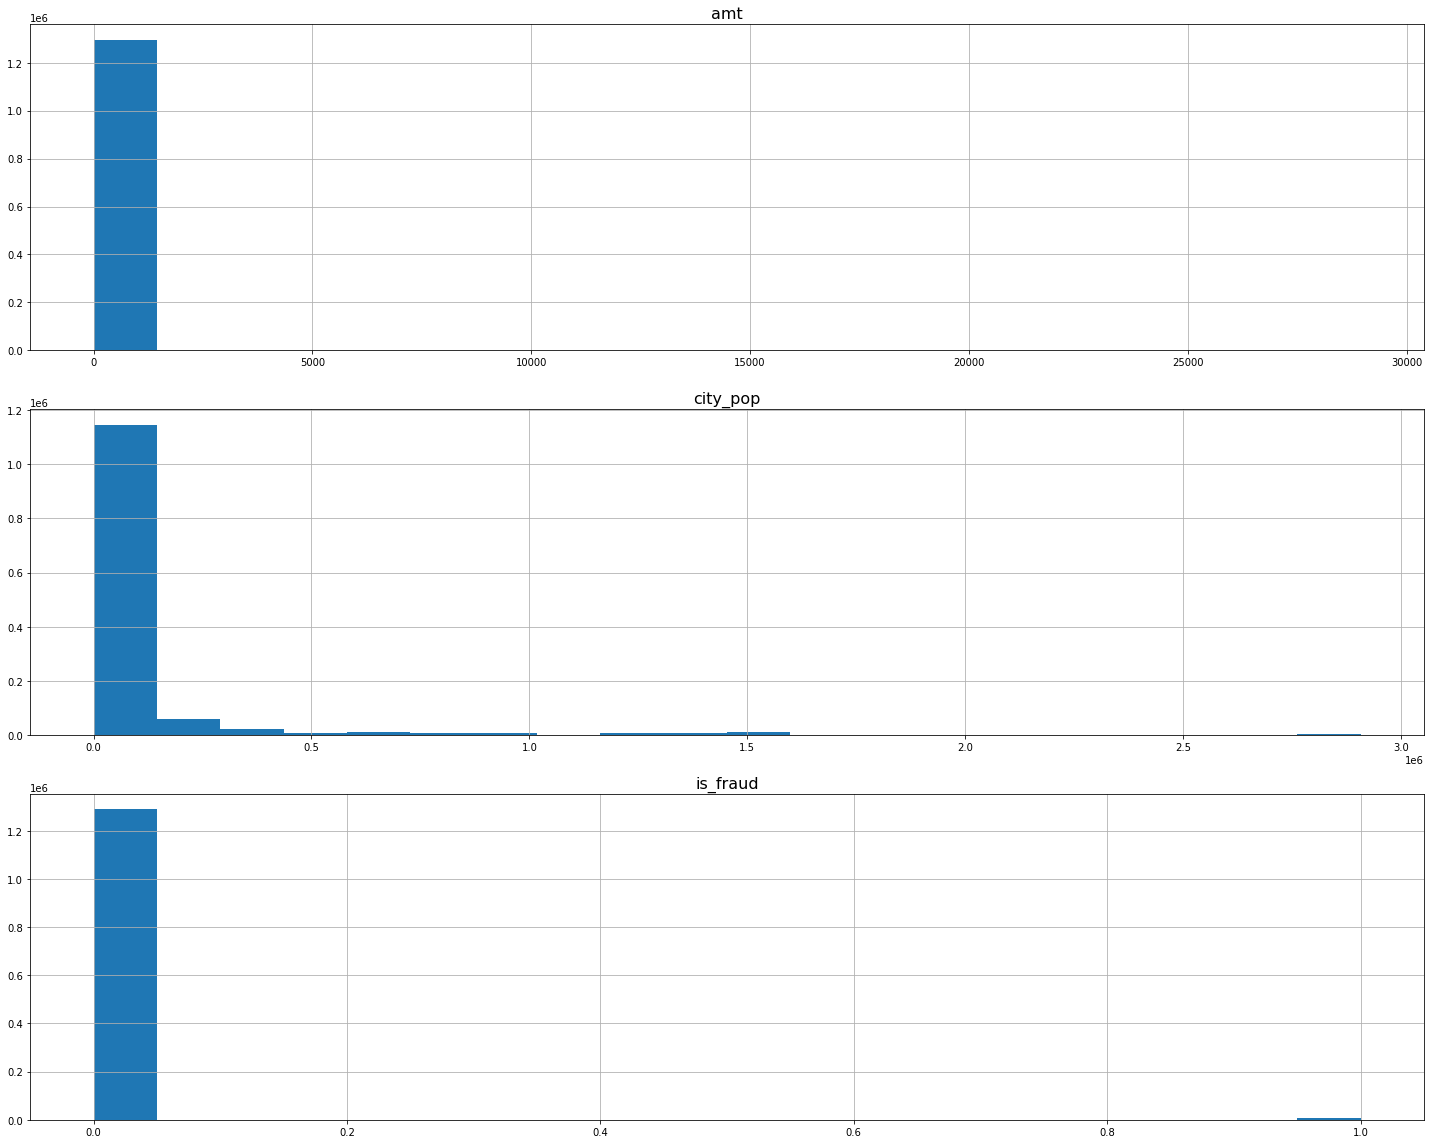

In [200]:
fig, axs = plt.subplots(3, 1, figsize=(20, 16))

axes = ["amt", "city_pop", "is_fraud"]

for index, name in enumerate(train[axes].columns):
    if index < 3:
        axes[index] = axs[index]
        train[name].hist(ax=axes[index], bins=20)
        axes[index].set_title(name, fontsize=16)

plt.tight_layout()
plt.show()

## Check `category` Distribution

Text(0.5, 1.0, 'Number of Transactions Based on Category')

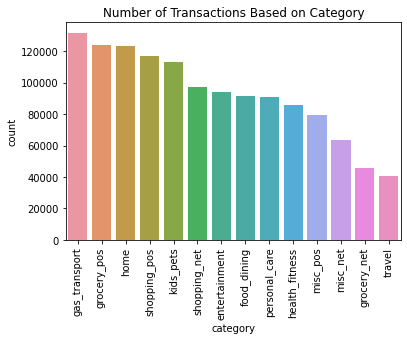

In [201]:
# sort train data by category
ax = sns.countplot(x="category", data=train, order=train.category.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Number of Transactions Based on Category")

From the above graph, the top 5 categories based on number of transactions are gas_transport, grocery_pos, home, shopping_pos and kids_pets.

## Check Proportion of Fraudulent Transactions Per `category`

In [202]:
#calculate the percentage difference
a=train[train['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=train[train['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Certain categories of spending are more susceptible to fraud, particularly 'Shopping_net', 'Grocery_pos', and 'misc_net'. Conversely, categories such as 'home' and 'kids_pets' generally experience higher volumes of legitimate transactions compared to fraudulent activity.

In [203]:
# sort fraudulent and non-fraudulent train data by category
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

train_fraudulent = train[train["is_fraud"] == 1]
train_non_fraudulent = train[train["is_fraud"] == 0]

ax_fraudulent = sns.countplot(x="category", data=train_fraudulent, ax=axes[0])
ax_fraudulent.set_xticklabels(ax_fraudulent.get_xticklabels(), rotation=90)
axes[0].set_title("Fraudulent Transactions")

ax_non_fraudulent = sns.countplot(x="category", data=train_non_fraudulent, ax=axes[1])
ax_non_fraudulent.set_xticklabels(ax_non_fraudulent.get_xticklabels(), rotation=90)
axes[1].set_title("Non-Fraudulent Transactions")

#ax_non_fraudulent_without_outliers = sns.countplot(x="category", data=train_non_fraudulent_without_outliers, ax=axes[2])
#ax_non_fraudulent_without_outliers.set_xticklabels(ax.get_xticklabels(), rotation=90) 



Text(0.5, 1.0, 'Non-Fraudulent Transactions')

From the above countplots we can see that among fraudulent transactions, gas_transport and travel have much higher occurrences compared to the other categories.

# Feature Engineering

In [221]:
train["transaction_dt"] = pd.to_datetime(train["trans_date_trans_time"])
test["transaction_dt"] = pd.to_datetime(test["trans_date_trans_time"])

# Extract the hour in which the transaction was made (0=midnight, 23=11p.m.)
train["transaction_hour"] = train["transaction_dt"].dt.hour
test["transaction_hour"] = test["transaction_dt"].dt.hour

# Extract the day of the week in which the transaction was made (Monday=0, Sunday=6)
train['transaction_day_of_week'] = train['transaction_dt'].dt.day_of_week
test['transaction_day_of_week'] = test['transaction_dt'].dt.day_of_week

# Extract the month in which the transaction was made (January=1, December=12)
train['transaction_month'] = train['transaction_dt'].dt.month
test['transaction_month'] = test['transaction_dt'].dt.month

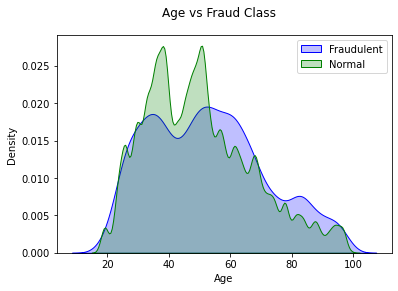

In [222]:
current_year = datetime.now().year
train['dob'] = pd.to_datetime(train['dob'])
train['age'] = current_year - train['dob'].dt.year
test['dob'] = pd.to_datetime(test['dob'])
test['age'] = current_year - test['dob'].dt.year


fig, ax = plt.subplots()

sns.kdeplot(train[train["is_fraud"]==1]["age"], fill=True, color="blue", label="Fraudulent", ax=ax)
sns.kdeplot(train[train["is_fraud"]==0]["age"], fill=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs Fraud Class")
plt.legend()

In [206]:
dims=(20,10)
fig,ax = plt.subplots(figsize = dims)
ax=sns.histplot(data=train, x="transaction_hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage of Transactions', fontsize=12)
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_title('Percentage of Fraudulent vs Non-Fraudulent Transactions by Hour', fontsize=14)

plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
# plt.show()

In [207]:
# Calculate the fraud rate
fraud_rate = (train[train['is_fraud'] == 1].groupby('transaction_day_of_week').size() /
              train.groupby('transaction_day_of_week').size())

# Convert to DataFrame for plotting
fraud_rate = fraud_rate.reset_index(name='fraud_rate')

days_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
            4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Apply the mapping to your 'transaction_day_of_week' column
fraud_rate['transaction_day_of_week'] = fraud_rate['transaction_day_of_week'].map(days_map)

# Plot the fraud rates by day of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(14, 6))
sns.barplot(x='transaction_day_of_week', y='fraud_rate', data=fraud_rate, order=days_order)
plt.title('Fraud Rate by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Fraud Rate')
plt.show()


## Encoding of Categorical Variables

In [223]:
#KIV
numerical_variables = ["amt", "lat", "long", "city_pop", "unix_time", "merch_lat", "merch_long", "age", "transaction_hour", 
                       "transaction_day_of_week", "transaction_month", "is_fraud"]
cat_variables = ["category", "gender"]
not_useful = ["trans_date_trans_time", "cc_num", "zip", "trans_num", "street", "dob", "first", "last", "merchant", "city", "job", "state", "transaction_dt"]

train_graph = train
test_graph = test

train = train.drop(train[not_useful], axis=1)
test = test.drop(test[not_useful], axis=1)

for category in cat_variables:
    encoded = pd.get_dummies(train[category], drop_first=True)
    test_encoded = pd.get_dummies(test[category], drop_first=True)
    train = pd.concat([train.drop([category], axis=1),encoded], axis=1)
    test = pd.concat([test.drop([category], axis=1),test_encoded], axis=1)

In [209]:
with pd.option_context('display.max_rows', None):
  print(train.dtypes)
train.describe()
train.columns = train.columns.astype(str)


amt                        float64
lat                        float64
long                       float64
city_pop                     int64
unix_time                    int64
merch_lat                  float64
merch_long                 float64
is_fraud                     int64
transaction_hour             int64
transaction_day_of_week      int64
transaction_month            int64
age                          int64
food_dining                  uint8
gas_transport                uint8
grocery_net                  uint8
grocery_pos                  uint8
health_fitness               uint8
home                         uint8
kids_pets                    uint8
misc_net                     uint8
misc_pos                     uint8
personal_care                uint8
shopping_net                 uint8
shopping_pos                 uint8
travel                       uint8
M                            uint8
dtype: object


## Splitting to Train, Validation

In [210]:
split_index = int(0.9 * len(train))
train_set = train.iloc[:split_index, :]
validation_set = train.iloc[split_index:, :]

validation_set.head()

amt      lat      long  city_pop   unix_time  merch_lat  \
1167007  87.66  48.8878 -118.2105       149  1367492969  48.777202   
1167008  55.22  39.6704  -89.8588      1213  1367493022  39.846241   
1167009  46.51  42.6315  -75.1866       165  1367493029  42.364697   
1167010  58.93  43.4987  -90.2796      1360  1367493045  44.053594   
1167011  37.11  44.6723 -103.8396      8007  1367493077  45.401825   

         merch_long  is_fraud  transaction_hour  transaction_day_of_week  ...  \
1167007 -118.972455         0                11                        5  ...   
1167008  -89.469599         0                11                        5  ...   
1167009  -75.843485         0                11                        5  ...   
1167010  -91.031229         0                11                        5  ...   
1167011 -103.544921         0                11                        5  ...   

         health_fitness  home  kids_pets  misc_net  misc_pos  personal_care  \
1167007               0     0          0         0         0              0   
1167008               0     0          0         0         0              0   
1167009               0     0          0         0         0              0   
1167010               0     0          0         0         0              0   
1167011               0     0          0         0         0              0   

         shopping_net  shopping_pos  travel  M  
1167007             0             0       0  0  
1167008             0             0       0  0  
1167009             0             0       0  0  
1167010             0             0       0  1  
1167011             0             0       0  0  

[5 rows x 26 columns]

In [147]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167007 entries, 0 to 1167006
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1167007 non-null  float64
 1   lat                      1167007 non-null  float64
 2   long                     1167007 non-null  float64
 3   city_pop                 1167007 non-null  int64  
 4   unix_time                1167007 non-null  int64  
 5   merch_lat                1167007 non-null  float64
 6   merch_long               1167007 non-null  float64
 7   is_fraud                 1167007 non-null  int64  
 8   transaction_hour         1167007 non-null  int64  
 9   transaction_day_of_week  1167007 non-null  int64  
 10  transaction_month        1167007 non-null  int64  
 11  age                      1167007 non-null  int64  
 12  food_dining              1167007 non-null  uint8  
 13  gas_transport            1167007 non-null 

In [148]:
validation_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129668 entries, 1167007 to 1296674
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      129668 non-null  float64
 1   lat                      129668 non-null  float64
 2   long                     129668 non-null  float64
 3   city_pop                 129668 non-null  int64  
 4   unix_time                129668 non-null  int64  
 5   merch_lat                129668 non-null  float64
 6   merch_long               129668 non-null  float64
 7   is_fraud                 129668 non-null  int64  
 8   transaction_hour         129668 non-null  int64  
 9   transaction_day_of_week  129668 non-null  int64  
 10  transaction_month        129668 non-null  int64  
 11  age                      129668 non-null  int64  
 12  food_dining              129668 non-null  uint8  
 13  gas_transport            129668 non-null  uint8  
 1

In [149]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      555719 non-null  float64
 1   lat                      555719 non-null  float64
 2   long                     555719 non-null  float64
 3   city_pop                 555719 non-null  int64  
 4   unix_time                555719 non-null  int64  
 5   merch_lat                555719 non-null  float64
 6   merch_long               555719 non-null  float64
 7   is_fraud                 555719 non-null  int64  
 8   transaction_hour         555719 non-null  int64  
 9   transaction_day_of_week  555719 non-null  int64  
 10  transaction_month        555719 non-null  int64  
 11  age                      555719 non-null  int64  
 12  food_dining              555719 non-null  uint8  
 13  gas_transport            555719 non-null  uint8  
 14  groc

### Feature Selection using RandomForestClassifier

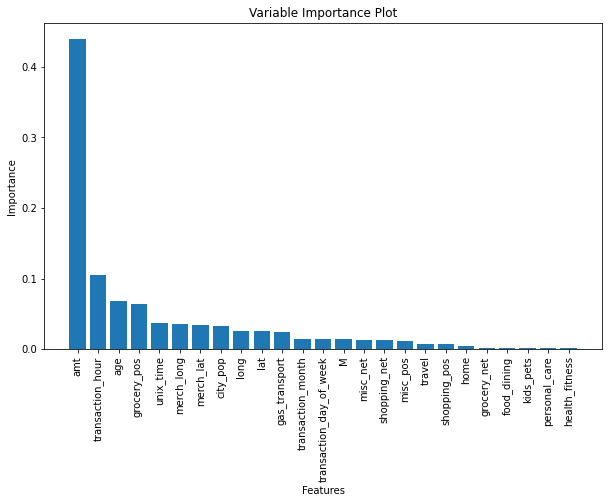

In [150]:
# Select columns
"""
------------------------ Original Columns -------------------

numerical_variables = ["amt", "lat", "long", "city_pop","unix_time", "merch_lat", "merch_long", "is_fraud"]

-------------------------To be Encoded---------------------

cat_variables = ["merchant", "category", "gender", "city", "state", "job"] 
not_useful = ["trans_date_trans_num", "cc_num", "trans_num", "street", "dob", "first", "last"]
"""
#selected_columns = ["amt", "lat", "long", "city_pop", "unix_time", "merch_lat", "merch_long", "is_fraud", 
#                    "transaction_hour", "transaction_day_of_week", "transaction_month"]

# Create a new DataFrame with selected columns
#df_selected = train_set[selected_columns]
df_selected = train_set
# Encode categorical variables if needed (use pd.get_dummies if necessary)

# Split the data into features (X) and target variable (y)
X = df_selected.drop("is_fraud", axis=1)
y = df_selected["is_fraud"]

# Initialize a random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X, y)

# Plot the variable importance
feature_importance = model.feature_importances_
feature_names = X.columns
data={'Feature': feature_names, 'Importance': feature_importance}
fi_df = pd.DataFrame(data)

fi_df = fi_df.sort_values(by=['Importance'], ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(fi_df['Feature'], fi_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Importance Plot')
plt.xticks(rotation=90)
plt.show()


In [151]:
# Drop the columns from the training set
X_train_log = train_set.drop("is_fraud", axis=1)
y_train_log = train_set['is_fraud']

# Drop the columns from the test set
X_test_log = test.drop("is_fraud", axis=1)
y_test_log = test['is_fraud']

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the model on the training data
log_reg.fit(X_train_log, y_train_log)

# Predict on the test set
y_pred_log = log_reg.predict(X_test_log)

# Evaluate the model's performance
print(classification_report(y_test_log, y_pred_log))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      555719 non-null  float64
 1   lat                      555719 non-null  float64
 2   long                     555719 non-null  float64
 3   city_pop                 555719 non-null  int64  
 4   unix_time                555719 non-null  int64  
 5   merch_lat                555719 non-null  float64
 6   merch_long               555719 non-null  float64
 7   transaction_hour         555719 non-null  int64  
 8   transaction_day_of_week  555719 non-null  int64  
 9   transaction_month        555719 non-null  int64  
 10  age                      555719 non-null  int64  
 11  food_dining              555719 non-null  uint8  
 12  gas_transport            555719 non-null  uint8  
 13  grocery_net              555719 non-null  uint8  
 14  groc

In [152]:
# Further evaluation
# Calculate evaluation metrics on test data
lg_accuracy = accuracy_score(y_test_log, y_pred_log)

# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Logistic Regression Accuracy: {:.3f}%".format(lg_accuracy * 100))

Logistic Regression Accuracy: 86.180%


The Logistic Regression is not a good model.

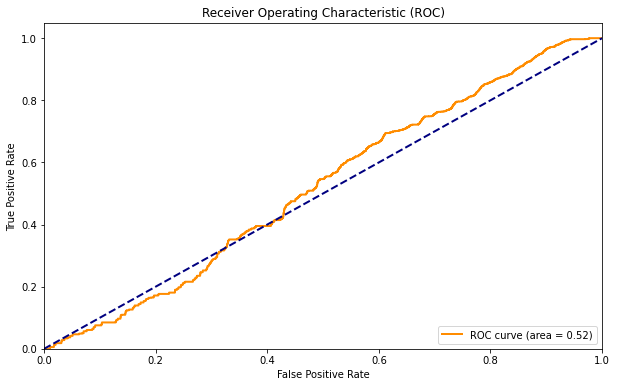

In [153]:
# Calculate ROC curve and AUC
probs = log_reg.predict_proba(X_test_log)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_log, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [154]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test_log, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Didnt predict any frauds LOL (updated: donez)

In [157]:
# Drop the columns from the training set
X_train_tree = train_set.drop('is_fraud', axis=1)
y_train_tree = train_set['is_fraud']

# Drop the columns from the test set
X_test_tree = test.drop('is_fraud', axis=1)
y_test_tree = test['is_fraud']

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Fit the model on the training data
decision_tree.fit(X_train_tree, y_train_tree)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test_tree)

# Evaluate the model's performance
print(classification_report(y_test_tree, y_pred_tree))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.92      0.60      0.73      2145

    accuracy                           1.00    555719
   macro avg       0.96      0.80      0.86    555719
weighted avg       1.00      1.00      1.00    555719



In [158]:
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model on the training data
random_forest.fit(X_train_tree, y_train_tree)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_tree)

# Evaluate the model's performance
print(classification_report(y_test_tree, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.99      0.62      0.76      2145

    accuracy                           1.00    555719
   macro avg       0.99      0.81      0.88    555719
weighted avg       1.00      1.00      1.00    555719



In [160]:
# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
gradient_boosting.fit(X_train_tree, y_train_tree)

# Predict on the test set
y_pred_gb = gradient_boosting.predict(X_test_tree)

# Evaluate the model's performance
print(classification_report(y_test_tree, y_pred_gb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.78      0.69      0.73      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.84      0.87    555719
weighted avg       1.00      1.00      1.00    555719



In [211]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [212]:
numerical_variables = ["amt", "lat", "long", "city_pop", "unix_time", "merch_lat", "merch_long", "transaction_hour", "transaction_day_of_week", "transaction_month"]

for i in numerical_variables:
    # fit on training data column
    scale = StandardScaler().fit(train_set[[i]])
    # transform the training data column
    train_set[i] = scale.transform(train_set[[i]])
    # transform the validation data column
    validation_set[i] = scale.transform(validation_set[[i]])
    #transform the test data column
    test[i] = scale.transform(test[[i]])

# Extract features and labels from the new dataset
X_train_num = train_set[numerical_variables]
X_train_cat = train_set.drop(numerical_variables, axis=1)
y_train = train_set["is_fraud"]

X_valid_num = validation_set[numerical_variables]
X_valid_cat = validation_set.drop(numerical_variables, axis=1)
y_valid = validation_set["is_fraud"]

bs = 50 #batch size
train_ds = torch.utils.data.TensorDataset(torch.tensor(X_train_num.values, dtype=torch.float32).float(), torch.tensor(X_train_cat.values,  dtype=torch.float32).float(), torch.tensor(y_train.values,  dtype=torch.float32).float())
valid_ds = torch.utils.data.TensorDataset(torch.tensor(X_valid_num.values,  dtype=torch.float32).float(), torch.tensor(X_valid_cat.values,  dtype=torch.float32).float(), torch.tensor(y_valid.values,  dtype=torch.float32).float())

train_dl = torch.utils.data.DataLoader(train_ds, batch_size=bs)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=bs)


class NumericalPrediction(nn.Module):
    def __init__(self):
        super(NumericalPrediction, self).__init__()
        self.num_layers = nn.Sequential(
            nn.Linear(len(numerical_variables), 64),  # Adjust input size based on the number of numerical features
            nn.ReLU())
        self.binary_layers = nn.Sequential(
            nn.Linear(len(X_train_cat.columns), 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU())
        self.drop_out = nn.Dropout(0.2)
        
        self.output_layer = nn.Linear(128,1)
        
    def forward(self, numerical_inputs, binary_inputs):
        numerical_outputs = self.num_layers(numerical_inputs)
        binary_outputs = self.binary_layers(binary_inputs)
        concatenated_outputs = torch.cat((numerical_outputs, binary_outputs), dim=1)
        final_outputs = self.drop_out(concatenated_outputs)
        final_outputs = self.output_layer(final_outputs)
        return final_outputs

# Instantiate the model
model = NumericalPrediction()


C:\Users\USER\AppData\Local\Temp\ipykernel_17600\2567903638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[i] = scale.transform(train_set[[i]])
C:\Users\USER\AppData\Local\Temp\ipykernel_17600\2567903638.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_set[i] = scale.transform(validation_set[[i]])
C:\Users\USER\AppData\Local\Temp\ipykernel_17600\2567903638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [213]:
activation_fn = torch.nn.ReLU()
model = NumericalPrediction()
#loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
pos_weight = torch.tensor([10])
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)

def loss_batch(model, loss_func, x_num, x_cat, yb, opt=None):
    #loss = loss_func(model(x_num, x_cat), yb)
    loss = loss_func(model(x_num, x_cat), yb.unsqueeze(1))

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(x_num)

def train(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for x_num, x_cat, yb in train_dl:
            loss_batch(model, loss_func, x_num, x_cat, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, x_num, x_cat, yb) for x_num, x_cat, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)
        if epoch == (epochs-1):
            torch.save(model.state_dict(), 'nn_model4.pth')


n_input = X_train_num.shape[1]
n_output = 1
n_hidden = 10
n_epoch = 10

In [214]:
train(n_epoch, model, loss_fn, optimizer, train_dl, valid_dl)

0 0.11961187493179107
1 0.10878917371466151
2 0.10696554668618238
3 0.10494829069687323
4 0.10504717226902753
5 0.1044757587321625
6 0.10354514956237876
7 0.10399855212704107
8 0.10415644026380834
9 0.10462989850987787


In [215]:
X_test_num = test[numerical_variables]
X_test_cat = test.drop(numerical_variables, axis=1)
y_test = test["is_fraud"]

ypred = model(torch.tensor(X_test_num.values).float(), torch.tensor(X_test_cat.values).float())
ypred = (ypred >= 0.5).float().numpy()
print('Confusion matrix: {}')
conf_matrix = confusion_matrix(y_test, ypred)
print(conf_matrix)
print('AUROC score: {}'.format(roc_auc_score(y_test, ypred)))
print('Accuracy score: {}'.format(accuracy_score(y_test, ypred)))
print(classification_report(y_test, ypred))

Confusion matrix: {}
[[551824   1750]
 [  1154    991]]
AUROC score: 0.7294216931833584
Accuracy score: 0.9947743373899399
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.36      0.46      0.41      2145

    accuracy                           0.99    555719
   macro avg       0.68      0.73      0.70    555719
weighted avg       1.00      0.99      1.00    555719



# Graph Model

In [224]:
full_dataset = pd.concat([train_graph, test_graph]).reset_index(drop=True)

split_index = int(0.9 * len(train_graph))
train_set = train_graph.iloc[:split_index, :]
validation_set = train_graph.iloc[split_index:, :]

validation_set.head()

trans_date_trans_time            cc_num  \
1167007   2020-05-02 11:09:29      630423337322   
1167008   2020-05-02 11:10:22   180047222886866   
1167009   2020-05-02 11:10:29      502012776709   
1167010   2020-05-02 11:10:45  2229378226512508   
1167011   2020-05-02 11:11:17  2719496466799416   

                                  merchant       category    amt      first  \
1167007  fraud_Goldner, Kovacek and Abbott    grocery_pos  87.66  Stephanie   
1167008                 fraud_Rau and Sons    grocery_pos  55.22  Christine   
1167009                fraud_Koss and Sons  gas_transport  46.51     Sherry   
1167010               fraud_Heller-Abshire    grocery_net  58.93     Thomas   
1167011                    fraud_Beier LLC  entertainment  37.11     Sheila   

             last gender                        street           city  ...  \
1167007      Gill      F  43039 Riley Greens Suite 393         Orient  ...   
1167008   Shaffer      F            14017 Thomas Plaza          Loami  ...   
1167009  Martinez      F         144 Yu Locks Apt. 754  Garrattsville  ...   
1167010      Hale      M             949 Smith Parkway      Cazenovia  ...   
1167011     Baker      F           8030 Walker Heights  Belle Fourche  ...   

                                trans_num   unix_time  merch_lat  merch_long  \
1167007  1904b64357509e73a7f3200240ab117d  1367492969  48.777202 -118.972455   
1167008  d6da40e00e7f7c9e842281b27f129c48  1367493022  39.846241  -89.469599   
1167009  51528894129e209074f228322f7bb59c  1367493029  42.364697  -75.843485   
1167010  67b2ccf6c28eb03430eaf247f16b693a  1367493045  44.053594  -91.031229   
1167011  71657fe0ca7d4c12845a9432331406c4  1367493077  45.401825 -103.544921   

         is_fraud      transaction_dt transaction_hour  \
1167007         0 2020-05-02 11:09:29               11   
1167008         0 2020-05-02 11:10:22               11   
1167009         0 2020-05-02 11:10:29               11   
1167010         0 2020-05-02 11:10:45               11   
1167011         0 2020-05-02 11:11:17               11   

        transaction_day_of_week  transaction_month  age  
1167007                       5                  5   45  
1167008                       5                  5   32  
1167009                       5                  5   78  
1167010                       5                  5   39  
1167011                       5                  5   83  

[5 rows x 27 columns]

In [225]:
txg = pd.melt(full_dataset, id_vars=['cc_num'], value_vars=['category', 'state', 'job'])
txg['TOKEN'] = txg['variable'].astype(str) + "_" + txg["value"].astype(str)
txg = txg[['cc_num', 'TOKEN']].groupby(['cc_num', 'TOKEN']).size().reset_index(name='TF')

# Calculate IDF for each cc_num
usg = txg[['cc_num', 'TOKEN']].groupby(['cc_num']).size().reset_index(name='IDF')

# Calculate TF-IDF for each cc_num and TOKEN combination
txg = txg.merge(usg, on='cc_num')
txg['TF_IDF'] = txg['TF'] / txg['IDF']

# Convert the cc_num and TOKEN combinations into an edge list
edge_list = list(txg.itertuples(index=False))
graph = from_edge_list(edge_list, bipartite=True)

# Extract biadjacency matrix and names
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

# Apply the Louvain algorithm
louvain = Louvain(resolution=1.7, modularity='newman')
louvain.fit(biadjacency)

# Extract labels
labels_row = louvain.labels_row_
labels_col = louvain.labels_col_

# Calculate and print modularity
print(get_modularity(biadjacency, labels_row, labels_col))

# Aggregate the graph
biadjacency_aggregate = louvain.aggregate_

# Get unique labels and their counts for rows and columns
labels_unique_row, counts_row = np.unique(labels_row, return_counts=True)
labels_unique_col, counts_col = np.unique(labels_col, return_counts=True)

0.08851268739572865


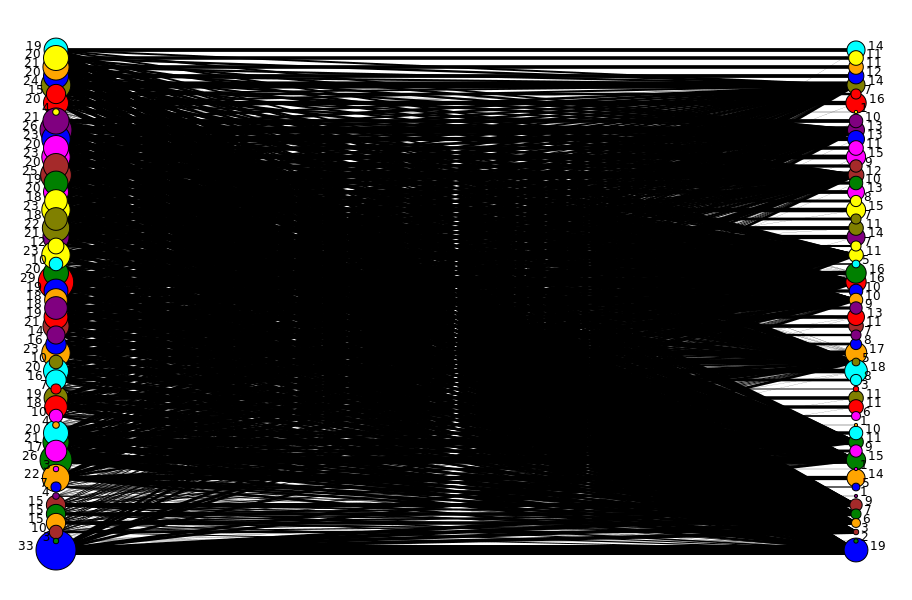

In [226]:
from IPython.display import SVG
from sknetwork.visualization import svg_bigraph
image = svg_bigraph(biadjacency_aggregate, counts_row, counts_col, labels_unique_row, labels_unique_col,
                    display_node_weight=True, node_weights_row=counts_row, node_weights_col=counts_col,
                    scale=0.5, height=1000, width=1600, reorder=True, edge_width_min = 0.0001, margin= 100)
SVG(image)

In [242]:
# Create a dictionary mapping cc_num to Louvain community labels
louv_dict = {name: label for name, label in zip(names_row, labels_row)}

# Apply the Louvain community mapping
train_set['louvain_community'] = train_set['cc_num'].map(louv_dict)
validation_set['louvain_community'] = validation_set['cc_num'].map(louv_dict)
test['louvain_community'] = test_graph['cc_num'].map(louv_dict)


C:\Users\USER\AppData\Local\Temp\ipykernel_17600\2933647097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['louvain_community'] = train_set['cc_num'].map(louv_dict)
C:\Users\USER\AppData\Local\Temp\ipykernel_17600\2933647097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_set['louvain_community'] = validation_set['cc_num'].map(louv_dict)


In [235]:
validation_set

trans_date_trans_time               cc_num  \
1167007   2020-05-02 11:09:29         630423337322   
1167008   2020-05-02 11:10:22      180047222886866   
1167009   2020-05-02 11:10:29         502012776709   
1167010   2020-05-02 11:10:45     2229378226512508   
1167011   2020-05-02 11:11:17     2719496466799416   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
1167007    fraud_Goldner, Kovacek and Abbott    grocery_pos   87.66   
1167008                   fraud_Rau and Sons    grocery_pos   55.22   
1167009                  fraud_Koss and Sons  gas_transport   46.51   
1167010                 fraud_Heller-Abshire    grocery_net   58.93   
1167011                      fraud_Beier LLC  entertainment   37.11   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
1167007    Stephanie       Gill      F   43039 Riley Greens Suite 393   
1167008    Christine    Shaffer      F             14017 Thomas Plaza   
1167009       Sherry   Martinez      F          144 Yu Locks Apt. 754   
1167010       Thomas       Hale      M              949 Smith Parkway   
1167011       Sheila      Baker      F            8030 Walker Heights   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...   unix_time  merch_lat  merch_long  \
1167007                    Orient  ...  1367492969  48.777202 -118.972455   
1167008                     Loami  ...  1367493022  39.846241  -89.469599   
1167009             Garrattsville  ...  1367493029  42.364697  -75.843485   
1167010                 Cazenovia  ...  1367493045  44.053594  -91.031229   
1167011             Belle Fourche  ...  1367493077  45.401825 -103.544921   
...                           ...  ...         ...        ...         ...   
1296670                     Hatch  ...  1371816728  36.841266 -111.690765   
1296671                 Tuscarora  ...  1371816739  38.906881  -78.246528   
1296672  High Rolls Mountain Park  ...  1371816752  33.619513 -105.130529   
1296673                 Manderson  ...  1371816816  42.788940 -103.241160   
1296674                      Sula  ...  1371816817  46.565983 -114.186110   

         is_fraud      transaction_dt transaction_hour  \
1167007         0 2020-05-02 11:09:29               11   
1167008         0 2020-05-02 11:10:22               11   
1167009         0 2020-05-02 11:10:29               11   
1167010         0 2020-05-02 11:10:45               11   
1167011         0 2020-05-02 11:11:17               11   
...           ...                 ...              ...   
1296670         0 2020-06-21 12:12:08               12   
1296671         0 2020-06-21 12:12:19               12   
1296672         0 2020-06-21 12:12:32               12   
1296673         0 2020-06-21 12:13:36               12   
1296674         0 2020-06-21 12:13:37               12   

       

In [230]:
def display_importances_xgb(model, use_features):
    fmap = {'f'+ str(index): x for index, x in enumerate(use_features, start=0)}
    fimp_df = pd.DataFrame(list(model.get_booster().get_fscore().items()))
    fimp_df.columns = ['feature', 'importance']
    fimp_df['importance']=fimp_df['importance']/np.sum(fimp_df['importance'])
    fimp_df['feature'] = fimp_df['feature'].map(fmap)

    plt.figure(figsize=(14, 10))
    sns.barplot(x="importance", y="feature", data=fimp_df.sort_values(by="importance", ascending=False))
    plt.title('Feature Importance')
    plt.tight_layout()

In [238]:

all_columns_to_drop = ['trans_date_trans_time','transaction_dt','dob']

# Drop the columns and separate the target
y_train = train_set['is_fraud']
X_train = train_set.drop(columns=all_columns_to_drop + ['is_fraud'], axis=1, errors='ignore')
y_validation = validation_set['is_fraud']
X_validation = validation_set.drop(columns=all_columns_to_drop + ['is_fraud'], axis=1, errors='ignore')

# Define numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features_to_impute = [col for col in numeric_features if col != 'louvain_community']
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Define transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_to_impute),
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough')

In [239]:
X_train

cc_num                            merchant       category  \
0        2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1            630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2          38859492057661                fraud_Lind-Buckridge  entertainment   
3        3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4         375534208663984                 fraud_Keeling-Crist       misc_pos   
...                   ...                                 ...            ...   
1167002   180064817343047   fraud_Raynor, Reinger and Hagenes  gas_transport   
1167003   371284100299909  fraud_Tillman, Fritsch and Schmitt       misc_net   
1167004  6538441737335434               fraud_Prohaska-Murray  gas_transport   
1167005   213178850083780                    fraud_Spinka Inc    grocery_net   
1167006    30442439074871       fraud_Lockman, West and Runte    grocery_pos   

            amt      first      last gender                        street  \
0          4.97   Jennifer     Banks      F                561 Perry Cove   
1        107.23  Stephanie      Gill      F  43039 Riley Greens Suite 393   
2        220.11     Edward   Sanchez      M      594 White Dale Suite 530   
3         45.00     Jeremy     White      M   9443 Cynthia Court Apt. 038   
4         41.96      Tyler    Garcia      M              408 Bradley Rest   
...         ...        ...       ...    ...                           ...   
1167002   46.00   Patricia  Gonzalez      F               8973 Mark Drive   
1167003    1.63     Hannah    Thomas      F              1004 Willis Pass   
1167004   77.35       Gina    Grimes      F               444 Robert Mews   
1167005   49.54      Shawn      King      M           31493 Garcia Summit   
1167006  174.43      Linda   Sanchez      F    6574 William Hill Apt. 375   

                   city state  ...                                  job  \
0        Moravian Falls    NC  ...            Psychologist, counselling   
1                Orient    WA  ...    Special educational needs teacher   
2            Malad City    ID  ...          Nature conservation officer   
3               Boulder    MT  ...                      Patent attorney   
4              Doe Hill    VA  ...       Dance movement psychotherapist   
...                 ...   ...  ...                                  ...   
1167002    Stephensport    KY  ...  Chartered public finance accountant   
1167003          Hedley    TX  ...                  Early years teacher   
1167004    Clarks Mills    PA  ...                       Energy manager   
1167005          Athena    OR  ...                               Dealer   
1167006          Jermyn    PA  ...     Training and development officer   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1167002  dd8baba2ea8fedfb6fd08b032f5fec4e  1367492500  38.754692  -86.520593   
1167003  e96124f36e8bdbf01540e97e16c1da51  1367492565  35.012224 -101.189680   
1167004  b6ea0c00b12377877f1fa209013f22ce  1367492666  41.143545  -80.420504   
1167005  66d27a3112fcfdd0c54fe9551b0f3be5  1367492690  46.158659 -118.946717   
1167006  60363529d139ca4b1b2436641043f5cd  1367492946  41.483827  -76.119400   

        transaction_hour  transaction_day_of_week  transaction_month  age  \
0                      0                        1                  1   35   
1                      0                        1                  1   45   
2                      0                

In [240]:

# Initialize the XGBClassifier with initial hyperparameters
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

xgb_clf = XGBClassifier(
    nthread=-1, n_estimators=100, learning_rate=0.1,
    objective='binary:logistic', max_depth=2,
    scale_pos_weight=scale_pos_weight, min_child_weight=80,
    gamma=10, max_delta_step=2
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', xgb_clf)])

# Train the model on the DataFrame
pipeline.fit(X_train, y_train)

# Get the trained XGBClassifier
trained_model = pipeline.named_steps['model']

# Evaluate on the validation set
y_pred = pipeline.predict(X_validation)
y_pred_proba = pipeline.predict_proba(X_validation)[:, 1]

# Calculate ROC-AUC and F1 score
roc_auc = roc_auc_score(y_validation, y_pred_proba)
f1 = f1_score(y_validation, y_pred)

print(f'ROC-AUC score on the validation set: {roc_auc}')
print(f'F1 score on the validation set: {f1}')
print(metrics.classification_report(y_validation, y_pred))

ROC-AUC score on the validation set: 0.9900240132729863
F1 score on the validation set: 0.23276240667545015
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    128836
           1       0.13      0.96      0.23       832

    accuracy                           0.96    129668
   macro avg       0.57      0.96      0.61    129668
weighted avg       0.99      0.96      0.97    129668



In [241]:
# Get feature names after one-hot encoding
ohe_feature_names = (pipeline.named_steps['preprocessor']
                            .named_transformers_['cat']
                            .named_steps['onehot']
                            .get_feature_names_out(categorical_features))

# Combine numeric and one-hot encoded feature names
features_after_preprocessing = np.append(numeric_features, ohe_feature_names)

# Display feature importances
display_importances_xgb(trained_model, features_after_preprocessing)

In [243]:
# Define a search space for hyperparameters
param_distributions = {
    'model__n_estimators': randint(50, 200),
    'model__learning_rate': uniform(0.01, 0.1),
    'model__max_depth': randint(3, 7),
    'model__min_child_weight': randint(1, 6),
    'model__gamma': uniform(0, 0.3),
    'model__max_delta_step': randint(0, 5),
    'model__scale_pos_weight': randint(1, 100)
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    scoring=make_scorer(average_precision_score),
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

# Print the best parameters found
print(f'Best parameters found: {random_search.best_params_}')

# Evaluate the best model found on the validation set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_validation)
y_pred_proba = best_model.predict_proba(X_validation)[:, 1]

# Calculate ROC-AUC and F1 score with the best model
roc_auc = roc_auc_score(y_validation, y_pred_proba)
f1 = f1_score(y_validation, y_pred)
print(f'ROC-AUC score with the best model: {roc_auc}')
print(f'F1 score with the best model: {f1}')
print(classification_report(y_validation, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [ ]:

y_test = test['is_fraud']
X_test = test.drop(columns=all_columns_to_drop + ['is_fraud'], axis=1, errors='ignore')

y_pred_test = best_model.predict(X_test)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

# Calculate the final ROC-AUC and F1 score for the test set
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
f1_test = f1_score(y_test, y_pred_test)

print(f'Final ROC-AUC score on the test set: {roc_auc_test}')
print(f'Final F1 score on the test set: {f1_test}')
print(classification_report(y_test, y_pred_test))